Hand Written Digit Prediction- Classification Analysis

The digits dataset consists of 8*8 pixel images of digits. The images attribute of the dataset stores 8*8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import Data

In [2]:
from sklearn.datasets import load_digits

In [3]:
df=load_digits()

In [4]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

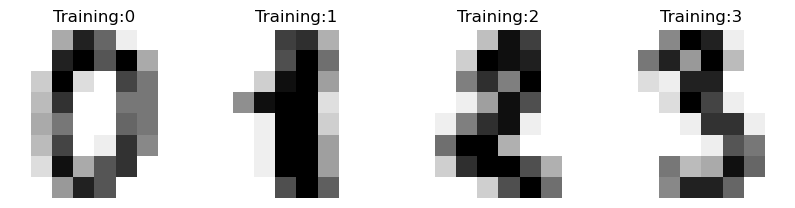

In [5]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training:%i"%label)

Data Preprocessing

In [6]:
df.images.shape

(1797, 8, 8)

In [7]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
df.images[0].shape

(8, 8)

In [9]:
len(df.images)

1797

In [10]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [11]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
data[0].shape

(64,)

In [13]:
data.shape

(1797, 64)

Scaling Image Data

In [14]:
data.min()

0.0

In [15]:
data.max()

16.0

In [16]:
data=data/16

In [17]:
data.min()

0.0

In [18]:
data.max()

1.0

In [19]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test Split Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf=RandomForestClassifier()

In [25]:
rf.fit(X_train,y_train)

RandomForestClassifier()

Predict Test Data

In [26]:
y_predict=rf.predict(X_test)

In [27]:
y_predict

array([1, 9, 2, 9, 5, 2, 7, 7, 5, 6, 8, 2, 5, 1, 2, 3, 9, 3, 3, 9, 8, 9,
       0, 1, 0, 1, 4, 9, 2, 6, 1, 5, 8, 3, 8, 3, 4, 1, 6, 3, 4, 2, 8, 5,
       1, 2, 1, 7, 1, 8, 6, 5, 6, 0, 3, 1, 7, 3, 4, 3, 8, 1, 2, 9, 9, 4,
       5, 2, 6, 1, 2, 7, 6, 7, 5, 5, 0, 1, 2, 2, 8, 1, 8, 2, 7, 4, 8, 7,
       5, 6, 1, 5, 8, 1, 9, 8, 0, 7, 9, 5, 2, 8, 1, 8, 8, 7, 9, 5, 0, 4,
       3, 3, 6, 8, 0, 4, 0, 3, 2, 1, 6, 1, 6, 8, 6, 4, 9, 2, 9, 5, 6, 5,
       1, 5, 2, 8, 5, 6, 0, 9, 4, 1, 8, 4, 9, 9, 1, 4, 0, 2, 8, 0, 6, 3,
       0, 5, 2, 2, 9, 6, 7, 1, 2, 9, 3, 6, 4, 0, 2, 8, 3, 6, 4, 2, 6, 0,
       1, 0, 3, 7, 7, 9, 0, 1, 7, 1, 3, 1, 9, 6, 7, 9, 7, 4, 1, 9, 9, 4,
       2, 2, 0, 6, 5, 5, 6, 9, 9, 5, 6, 8, 6, 1, 4, 5, 1, 3, 8, 5, 5, 1,
       9, 1, 4, 7, 4, 8, 6, 6, 2, 2, 8, 3, 4, 2, 1, 5, 7, 0, 2, 9, 1, 3,
       0, 1, 7, 1, 2, 2, 2, 2, 0, 4, 2, 9, 3, 2, 6, 8, 7, 7, 1, 2, 7, 0,
       2, 9, 3, 3, 8, 3, 0, 4, 1, 5, 5, 1, 8, 2, 7, 2, 4, 3, 0, 4, 4, 1,
       7, 7, 7, 9, 5, 7, 3, 9, 7, 4, 2, 1, 4, 1, 4,

Model Accuracy

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
confusion_matrix(y_test,y_predict)

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 60,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 49,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 47,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  2,  1,  1,  0,  0,  0,  1, 43,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 55]], dtype=int64)

In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.94      0.98      0.96        65
           2       0.98      0.98      0.98        61
           3       0.94      0.96      0.95        51
           4       0.98      0.96      0.97        51
           5       1.00      0.98      0.99        48
           6       1.00      0.95      0.97        60
           7       0.92      1.00      0.96        46
           8       0.98      0.90      0.93        48
           9       0.98      0.98      0.98        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

